## <span style="color:#FFA500;">Summation of series</span>

### <span style="color:#FFA500;">Arithmetic series</span>

The relevant charasteristic is that the difference between sucessions is constant
<center>

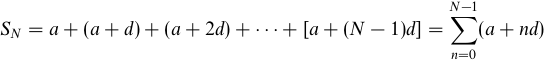
</center>
rewritten the expression, we have
<center>

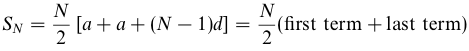
<center>

In [ ]:
def arithmetic_serie(start_term_a: float | int ,
                     nth_term: int , 
                     constant_ratio_d: float | int) -> float | int:
    """
    Calculates the sum of an arithmetic series.

    Args:
        start_term_a: The first term of the arithmetic series.
        nth_term: The position of the term to be calculated.
        constant_ratio_d: The common difference between consecutive terms.

    Returns:
        The sum of the arithmetic series up to the nth term.

    Example:
    >>> arithmetic_serie(43.322, 8000,43.6)
    1395372176.0
    """
    first_term = start_term_a
    last_term = start_term_a + ((nth_term-1)*constant_ratio_d)
    return nth_term/2 * (first_term + last_term)

### <span style="color:#FFA500;">Geometric series</span>

As a simple example of many of the ideas involved in series, we are going to consider
the geometric series. You may recall that in a geometric progression we multiply
each term by some ﬁxed number to get the next term. For example, the sequences are geometric progressions:
<center>

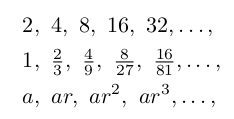
</center>

And, by the exposed, this is the general form:
<center>

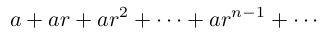
</center>

In [ ]:
def geometric_series(
    nth_term: float | int,
    start_term_a: float | int,
    common_ratio_r: float | int,
) -> list[float | int]:
    """
    Pure Python implementation of Geometric Series algorithm

    :param nth_term: The last term (nth term of Geometric Series)
    :param start_term_a : The first term of Geometric Series
    :param common_ratio_r : The common ratio between all the terms
    :return: The Geometric Series starting from first term a and multiple of common
        ration with first term with increase in power till last term (nth term)
    Examples:
    >>> geometric_series(4, 2, 2)
    [2, 4.0, 8.0, 16.0]
    >>> geometric_series(4.0, 2.0, 2.0)
    [2.0, 4.0, 8.0, 16.0]
    >>> geometric_series(4.1, 2.1, 2.1)
    [2.1, 4.41, 9.261000000000001, 19.448100000000004]
    >>> geometric_series(4, 2, -2)
    [2, -4.0, 8.0, -16.0]
    >>> geometric_series(4, -2, 2)
    [-2, -4.0, -8.0, -16.0]
    >>> geometric_series(-4, 2, 2)
    []
    >>> geometric_series(0, 100, 500)
    []
    >>> geometric_series(1, 1, 1)
    [1]
    >>> geometric_series(0, 0, 0)
    []
    """
    if not all((nth_term, start_term_a, common_ratio_r)):
        return []
    series: list[float | int] = []
    power = 1
    multiple = common_ratio_r
    for _ in range(int(nth_term)):
        if not series:
            series.append(start_term_a)
        else:
            power += 1
            series.append(float(start_term_a * multiple))
            multiple = pow(float(common_ratio_r), power)
    return series

In [ ]:
nth_term = float(input("Enter the last number (n term) of the Geometric Series"))
start_term_a = float(input("Enter the starting term (a) of the Geometric Series"))
common_ratio_r = float(
    input("Enter the common ratio between two terms (r) of the Geometric Series")
)
print("Formula of Geometric Series => a + ar + ar^2 ... +ar^n")
print(geometric_series(nth_term, start_term_a, common_ratio_r))

### <span style="color:#FFA500;">Sum of a successive series</span>

Since the sum of n terms of the geometric progression
<center>
    
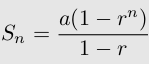 

</center>

It is possible to calculate the sum of the geometric serie (if this has one) by the below definition:

<center>

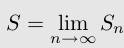
</center>
However, in the following code will check the existence of limit for the same values above. 

In the computation may appear that the calculation can encounter an overflow issue with extremely large values of nth term. In such cases, the computation may not be feasible using standard numerical approaches.

A valid workaround is to apply numerical approximation technique to estimate the resul. On this case, where we want to determine the limit, ```np.isclose``` function from NumPy can check if the partial sum is close to infinity:

In [ ]:
import numpy as np

def check_geometric_series_limit(
        nth_term: float | int,
        start_term_a: float | int,
        common_ratio_r: float | int) -> bool:
    """Check the limit of a geometric series.

    Calculates the partial sum of a geometric series and checks if the partial sum
    approaches infinity.

    Args:
        nth_term: The index of the last term in the series.
        start_term_a: The value of the first term in the series.
        common_ratio_r: The common ratio between terms in the series.

    Returns:
        True if the limit of the geometric series is infinity, False otherwise.

    Examples:
        >>> check_geometric_series_limit(43200000, 203.132, 32944.3)
        True
    """

    # Define the variables
    a = start_term_a
    r = common_ratio_r

    # Calculate the partial sum of the geometric series using logarithmic approach
    if np.isclose(r, 1):
        partial_sum = a * (nth_term + 1)
    elif r > 1:
        partial_sum = np.inf
    else:
        partial_sum = a * (1 - np.exp(nth_term * np.log(r))) / (1 - r)

    # Check the limit
    if np.isclose(partial_sum, np.inf):
        return True
    return False

### <span style="color:#FFA500;">Arithmetico-geometric series</span>

In Arithmetico-geometric series, as its name suggests, is a conbined arihmeic and geometric series. The general form is

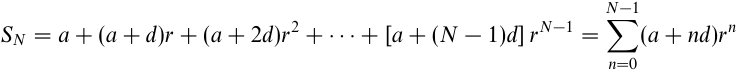

For infinite series with 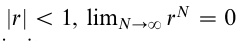 conditions and the sum tends to the limit

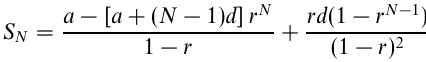

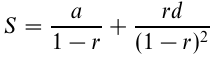

As for a geometric series, if 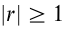, then the series either oscillates or diverges.

Eg.

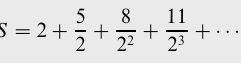

In this infinite arithmetico-geometric serie wih 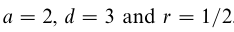, the summation is obtained as S=10.

## <span style="color:#FFA500;">Convergence of infinite series tests</span>

### <span style="color:#FFA500;">Convergent and divergent series</span>

It is understood that S is a finite number.

If S exists, the series is said to be convergent. If S does not exist, the series is said to be divergent.

a. If the partial sums S_n of an infinite series tend to limit S, the serie is called convergent.

b. The limiting of S is called the sum of the series.

c. The difference 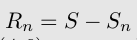 is called the remainder or the remainder after n terms.

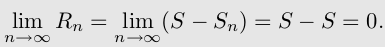

In [ ]:
from enum import Enum
from ta import Indicator
from ta.trend.strength import trend_strength
from ta.volatility import AverageTrueRangeIndicator
from ta.momentum import rsi
from ta.utils import IndicatorMixin
import numpy as np


class ConvergenceDivergenceIndicator(IndicatorMixin, Indicator):
    class ConvergenceDivergenceType(Enum):
        POSITIVE_CONVERGENT = "positiveConvergent"
        NEGATIVE_CONVERGENT = "negativeConvergent"
        POSITIVE_DIVERGENT = "positiveDivergent"
        NEGATIVE_DIVERGENT = "negativeDivergent"

    class ConvergenceDivergenceStrictType(Enum):
        POSITIVE_CONVERGENT_STRICT = "positiveConvergentStrict"
        NEGATIVE_CONVERGENT_STRICT = "negativeConvergentStrict"
        POSITIVE_DIVERGENT_STRICT = "positiveDivergentStrict"
        NEGATIVE_DIVERGENT_STRICT = "negativeDivergentStrict"

    def __init__(self, ref, other, bar_count, type=None, strict_type=None, min_strength=0.8, min_slope=0.3):
        self.ref = ref
        self.other = other
        self.bar_count = bar_count
        self.type = type
        self.strict_type = strict_type
        self.min_strength = min_strength
        self.min_slope = min_slope

    def _calculate(self):
        if self.min_strength == 0:
            return False

        if self.type is not None:
            if self.type == self.ConvergenceDivergenceType.POSITIVE_CONVERGENT:
                return self._calculate_positive_convergence()
            elif self.type == self.ConvergenceDivergenceType.NEGATIVE_CONVERGENT:
                return self._calculate_negative_convergence()
            elif self.type == self.ConvergenceDivergenceType.POSITIVE_DIVERGENT:
                return self._calculate_positive_divergence()
            elif self.type == self.ConvergenceDivergenceType.NEGATIVE_DIVERGENT:
                return self._calculate_negative_divergence()

        elif self.strict_type is not None:
            if self.strict_type == self.ConvergenceDivergenceStrictType.POSITIVE_CONVERGENT_STRICT:
                return self._calculate_positive_convergence_strict()
            elif self.strict_type == self.ConvergenceDivergenceStrictType.NEGATIVE_CONVERGENT_STRICT:
                return self._calculate_negative_convergence_strict()
            elif self.strict_type == self.ConvergenceDivergenceStrictType.POSITIVE_DIVERGENT_STRICT:
                return self._calculate_positive_divergence_strict()
            elif self.strict_type == self.ConvergenceDivergenceStrictType.NEGATIVE_DIVERGENT_STRICT:
                return self._calculate_negative_divergence_strict()

    def _calculate_positive_convergence(self):
        # Calculate positive convergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_positive_changes = ref_changes[ref_changes > 0]
        other_positive_changes = other_changes[other_changes > 0]

        ref_change_sum = np.sum(ref_positive_changes)
        other_change_sum = np.sum(other_positive_changes)

        ref_avg_change = ref_change_sum / len(ref_positive_changes)
        other_avg_change = other_change_sum / len(other_positive_changes)

        if ref_avg_change > other_avg_change:
            return True

        return False

    def _calculate_negative_convergence(self):
        # Calculate negative convergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_negative_changes = ref_changes[ref_changes < 0]
        other_negative_changes = other_changes[other_changes < 0]

        ref_change_sum = np.sum(ref_negative_changes)
        other_change_sum = np.sum(other_negative_changes)

        ref_avg_change = ref_change_sum / len(ref_negative_changes)
        other_avg_change = other_change_sum / len(other_negative_changes)

        if ref_avg_change < other_avg_change:
            return True

        return False

    def _calculate_positive_divergence(self):
        # Calculate positive divergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_positive_changes = ref_changes[ref_changes > 0]
        other_positive_changes = other_changes[other_changes > 0]

        ref_change_sum = np.sum(ref_positive_changes)
        other_change_sum = np.sum(other_positive_changes)

        ref_avg_change = ref_change_sum / len(ref_positive_changes)
        other_avg_change = other_change_sum / len(other_positive_changes)

        if ref_avg_change < other_avg_change:
            return True

        return False

    def _calculate_negative_divergence(self):
        # Calculate negative divergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_negative_changes = ref_changes[ref_changes < 0]
        other_negative_changes = other_changes[other_changes < 0]

        ref_change_sum = np.sum(ref_negative_changes)
        other_change_sum = np.sum(other_negative_changes)

        ref_avg_change = ref_change_sum / len(ref_negative_changes)
        other_avg_change = other_change_sum / len(other_negative_changes)

        if ref_avg_change > other_avg_change:
            return True

        return False

    def _calculate_positive_convergence_strict(self):
        # Calculate strict positive convergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_positive_changes = ref_changes[ref_changes > 0]
        other_positive_changes = other_changes[other_changes > 0]

        if len(ref_positive_changes) >= self.bar_count and len(other_positive_changes) >= self.bar_count:
            ref_change_sum = np.sum(ref_positive_changes[:self.bar_count])
            other_change_sum = np.sum(other_positive_changes[:self.bar_count])

            ref_avg_change = ref_change_sum / self.bar_count
            other_avg_change = other_change_sum / self.bar_count

            if ref_avg_change > other_avg_change and trend_strength(ref_positive_changes) > self.min_strength:
                return True

        return False

    def _calculate_negative_convergence_strict(self):
        # Calculate strict negative convergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_negative_changes = ref_changes[ref_changes < 0]
        other_negative_changes = other_changes[other_changes < 0]

        if len(ref_negative_changes) >= self.bar_count and len(other_negative_changes) >= self.bar_count:
            ref_change_sum = np.sum(ref_negative_changes[:self.bar_count])
            other_change_sum = np.sum(other_negative_changes[:self.bar_count])

            ref_avg_change = ref_change_sum / self.bar_count
            other_avg_change = other_change_sum / self.bar_count

            if ref_avg_change < other_avg_change and trend_strength(ref_negative_changes) > self.min_strength:
                return True

        return False

    def _calculate_positive_divergence_strict(self):
        # Calculate strict positive divergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_positive_changes = ref_changes[ref_changes > 0]
        other_positive_changes = other_changes[other_changes > 0]

        if len(ref_positive_changes) >= self.bar_count and len(other_positive_changes) >= self.bar_count:
            ref_change_sum = np.sum(ref_positive_changes[:self.bar_count])
            other_change_sum = np.sum(other_positive_changes[:self.bar_count])

            ref_avg_change = ref_change_sum / self.bar_count
            other_avg_change = other_change_sum / self.bar_count

            if ref_avg_change < other_avg_change and trend_strength(ref_positive_changes) > self.min_strength:
                return True

        return False

    def _calculate_negative_divergence_strict(self):
        # Calculate strict negative divergence
        ref_values = self.ref
        other_values = self.other

        ref_changes = np.diff(ref_values)
        other_changes = np.diff(other_values)

        ref_negative_changes = ref_changes[ref_changes < 0]
        other_negative_changes = other_changes[other_changes < 0]

        if len(ref_negative_changes) >= self.bar_count and len(other_negative_changes) >= self.bar_count:
            ref_change_sum = np.sum(ref_negative_changes[:self.bar_count])
            other_change_sum = np.sum(other_negative_changes[:self.bar_count])

            ref_avg_change = ref_change_sum / self.bar_count
            other_avg_change = other_change_sum / self.bar_count

            if ref_avg_change > other_avg_change and trend_strength(ref_negative_changes) > self.min_strength:
                return True

        return False

# Usage example:
ref = [1, 2, 3, 4, 5]
other = [2, 4, 6, 8, 10]

indicator = ConvergenceDivergenceIndicator(ref, other, 3, type=ConvergenceDivergenceIndicator.ConvergenceDivergenceType.POSITIVE_CONVERGENT)
result = indicator._calculate()
print(result)

### <span style="color:#FFA500;">The comparison test </span>
### <span style="color:#FFA500;">The integral test</span>
### <span style="color:#FFA500;">The ratio test</span>
### <span style="color:#FFA500;">A special comparison test</span>


## <span style="color:#FFA500;">Power series</span>

## <span style="color:#FFA500;">Taylor series</span>

## <span style="color:#FFA500;">Techniques for obtaining Power Series Expansion</span>